<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-06-03-multivariate-statistics-correspondence-analysis-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3. Correspondence Analysis (CA)

In this tutorial, we will discuss the key concepts of `Simple Correspondence Analysis (CA)`, and its' variants such as `Multiple Correspondence Abnalysis`, `Detrended Correspondence Analysis (DCA)`, `Canonical Correspondence Analysis (CCA)`, and `Canonical Correlation Analysis (CCA)` including the steps involved in performing these analyses, interpreting the results, and visualizing the relationships between categories. We will also demonstrate how to perform these analyses in R using both a manual approach and the different R-packages


## Overview

### Simple Correspondence Analysis (SCA)

`Simple Correspondence Analysis (SCA)` is a multivariate dimension reduction technique used to summarize large contingency tables into a smaller number of dimensions, allowing you to visualize the relationships between categories. CA is similar to Principal Component Analysis (PCA) but is specifically designed for categorical data. It is often used in fields such as marketing, market research, and social sciences to analyze survey data, customer preferences, and other categorical data.

-   Input: A contingency table $\mathbf{N}$ (rows = categories, columns = categories).

-   Step 1: Compute the **relative frequencies**:

    $$\mathbf{P} = \frac{\mathbf{N}}{\text{grand total}}$$

-   Step 2: Compute **row and column margins**:

    $$ \mathbf{r} = \text{row sums of } \mathbf{P}, \quad \mathbf{c} = \text{column sums of } \mathbf{P}$$

-   Step 3: Standardize deviations:

    $$\mathbf{S} = \mathbf{P} - \mathbf{r} \mathbf{c}^\top$$

-   Step 4: Perform Singular Value Decomposition (SVD):

    $$\mathbf{S} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top$$

-   Step 5: Obtain principal coordinates for rows and columns:

$$ \mathbf{F} = \mathbf{U} \boldsymbol{\Sigma}, \quad \mathbf{G} = \mathbf{V} \boldsymbol{\Sigma} $$

### Multiple Correspondence Analysis (MCA)

**Multiple Correspondence Analysis (MCA)** is an extension of Correspondence Analysis (CA) used to analyze datasets involving more than two categorical variables. It explores and visualizes relationships between individuals (rows) and categorical variables (columns) in a low-dimensional space. MCA is particularly useful for uncovering patterns in survey data, market research, or any dataset with multiple categorical variables. Mathmatical representation of MCA is similar to CA but it is applied to more than two categorical variables.

-   Input: A dataset with $m$ categorical variables converted to a **complete disjunctive table** $\mathbf{Z}$.

-   Step 1: Compute $\mathbf{P}$ and margins $\mathbf{r}$, $\mathbf{c}$.

-   Step 2: Standardize $\mathbf{Z}$:

    $$ \mathbf{S} = \mathbf{Z} - \mathbf{r} \mathbf{c}^\top $$

-   Step 3: Perform SVD: Same as in SCA.

### Detrended Correspondence Analysis (DCA)

Detrended Correspondence Analysis (DCA) is an ordination technique used primarily in ecological studies to handle species composition data. It is an extension of Correspondence Analysis (CA) that corrects for two main problems that arise in CA: arch effects (curvature in ordination space) and compression of gradients (uneven scaling along axes).

-   Follow SCA to compute initial scores.
-   Step 1: Divide the ordination axes into segments.
-   Step 2: Compute segment means and subtract these from the scores to remove the **arch effect**.
-   Step 3: Rescale the axes to represent **species turnover**.

### Canonical Correspondence Analysis (CCA)

-   Input:

    -   $\mathbf{Y}$: Species abundance data (rows = sites, columns = species).
    -   $\mathbf{X}$: Environmental variables (rows = sites, columns = variables).

-   Step 1: Compute $\mathbf{X}'\mathbf{X}$ and project $\mathbf{Y}$ into the space of $\mathbf{X}$:

    $$ \mathbf{Y}_c = \mathbf{Y} - \mathbf{X} (\mathbf{X}'\mathbf{X})^{-1} \mathbf{X}' \mathbf{Y} $$

-   Step 2: Perform SVD on $\mathbf{Y}_c$.

### Canonical Correlation Analysis (CCA)

Canonical Correlation Analysis (CCA) is a statistical method used to analyze the relationship between two sets of variables. It is a multivariate technique that seeks to find the linear combination of variables in each set that has the highest correlation with the linear combination of variables in the other set.

In other words, CCA aims to find the linear combinations of variables in two sets that are most related to each other, while also maximizing the correlation within each set. It is a useful tool in data analysis when there are two or more sets of variables that are thought to be related.

-   Input:

     Two datasets, $\mathbf{X}$ (e.g., environmental data) and $\mathbf{Y}$ (e.g., species data).

-   Step 1: Compute covariance matrices:

-   Step 2: Solve the generalized eigenvalue problem:

  $$ \mathbf{C}_{XY} \mathbf{C}_{YY}^{-1} \mathbf{C}_{YX} \mathbf{a} = \lambda \mathbf{C}_{XX} \mathbf{a} $$

-   Step 3: Use eigenvectors to compute canonical scores.

### Summary Table

| Method | Input | Key Computation | R Output Example |
|------------------|------------------|------------------|------------------|
| **Simple CA** | Contingency table $N$) | SVD on standardized residuals $S$ | $F$ and $G$ (row, column scores) |
| **Multiple CA** | Indicator matrix $Z$ | SVD on $Z$ | $F$ and $G$ |
| **Detrended CA** | Contingency table $N$ | Detrend and rescale $F$, $G$ | Adjusted $F$, $G$ |
| **Canonical CA** | Species $Y$, Environment $X$ | Constrain scores using $\beta$ | $Z$ (constrained ordination) |
| **Canonical Correlation** | Matrices $X$, $Y$ | Solve eigenvalue problem | Canonical coefficients $a, b$ |

## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314966 sha256=0af8d7a5ce012558b10a131c906e346f74dc6bd08f5a450c2d70cedfec9a5307
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Performing Correspondence Analysis in R fraom Scratch


### Simple Correspondence Analysis (SCA)

Here below is the step-by-step guide to perform Simple Correspondence Analysis (SCA) in R without using any packages:

In [ ]:
%%R
# Example contingency table
N <- matrix(c(50, 30, 20, 40, 60, 50), nrow = 2)
rownames(N) <- c("Row1", "Row2")
colnames(N) <- c("Col1", "Col2", "Col3")

# Step 1: Compute relative frequencies
P <- N / sum(N)

# Step 2: Compute row and column margins
row_margins <- rowSums(P)
col_margins <- colSums(P)

# Step 3: Standardize deviations
S <- P - row_margins %*% t(col_margins)

# Step 4: Perform SVD
SVD <- svd(S)
U <- SVD$u
V <- SVD$v
Sigma <- diag(SVD$d)

# Step 5: Compute principal coordinates
F <- U %*% Sigma
G <- V %*% Sigma

# Print results
cat("Row Scores (F):\n", F, "\n")
cat("Column Scores (G):\n", G, "\n")

Row Scores (F):
 -0.05710902 0.05710902 0 0 
Column Scores (G):
 -0.04751758 0.06335677 -0.01583919 0 0 0 


In [ ]:
%5R -w 600 -h 500 -u px
# Visualization
plot(F, type = "p", xlab = "Dim1", ylab = "Dim2", col = "blue", main = "SCA Plot")
points(G, col = "red", pch = 2)
legend("topright", legend = c("Rows", "Columns"), col = c("blue", "red"), pch = c(1, 2))

### Modifications for MCA, DCA, CCA, and Canonical Correlation

#### MCA

Replace $N$ with a **complete disjunctive table** for multiple categorical variables.

#### DCA

Detrending would involve manually adjusting axis scores, as described in the explanation.

#### CCA and Canonical Correlation

For CCA and Canonical Correlation Analysis, compute projections or eigenvalues as outlined in the math sections above using matrix operations.

#### Example Summary and Visualization

#### Results:

-   SCA: Visualizes relationships between rows and columns of the contingency table.
-   MCA: Shows relationships among multiple variables and individuals.
-   CCA: Highlights species-environment interactions.

#### Plot Example:

Plots will use scatterplots with different colors for rows, columns, or variable types to highlight associations.

By coding this way, you maintain full transparency of the mathematical process, but it requires careful handling of data to avoid errors!

## Performing Correspondance Analysis in R

Performing different types Correspondence Analysis (CA) in R is straightforward using the {FactoMineR}, {vegan}, and {ade4} packages. These packages provide functions to perform CA, MCA, DCA, CCA, and Canonical Correlation Analysis with minimal coding effort.

### Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [ ]:
%%R
 packages <- c('tidyverse',
              'plyr',
              'corrr',
              'ggcorrplot',
              'factoextra',
              'ade4',
              'psych',
              'FactoMineR',
              'CCA',
              'vegan'
		 )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
 tidyverse       plyr      corrr ggcorrplot factoextra       ade4      psych 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
FactoMineR        CCA      vegan 
      TRUE       TRUE       TRUE 


### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages

Successfully loaded packages:
 [1] "package:vegan"       "package:lattice"     "package:permute"    
 [4] "package:CCA"         "package:fields"      "package:viridisLite"
 [7] "package:spam"        "package:fda"         "package:deSolve"    
[10] "package:fds"         "package:RCurl"       "package:rainbow"    
[13] "package:pcaPP"       "package:MASS"        "package:splines"    
[16] "package:FactoMineR"  "package:psych"       "package:ade4"       
[19] "package:factoextra"  "package:ggcorrplot"  "package:corrr"      
[22] "package:plyr"        "package:lubridate"   "package:forcats"    
[25] "package:stringr"     "package:dplyr"       "package:purrr"      
[28] "package:readr"       "package:tidyr"       "package:tibble"     
[31] "package:ggplot2"     "package:tidyverse"   "package:tools"      
[34] "package:stats"       "package:graphics"    "package:grDevices"  
[37] "package:utils"       "package:datasets"    "package:methods"    
[40] "package:base"       


### Simple Correspondence Analysis (SCA)

We will perform Simple Correspondence Analysis (SCA) using  following R packages:

-   {FactoMineR}: ideal for a beginner-friendly and detailed analysis, with good default visualizations.
-   {vegan}: useful for ecological and environmental data.
-   {ade4}: flexible and supports advanced multivariate analyses.

#### Data

In this exercise we will use the `children` dataset from the {FactoMineR} package to perform Canonical Correlation Analysis (CCA). The `children` dataset contains information about children's preferences for different activities. The data used here is a contingency table that summarizes the answers given by different categories of people to the following question : according to you, what are the reasons that can make hesitate a woman or a couple to have children?

In [ ]:
%%R
data(children)
mf.children<-na.omit(children)
glimpse(mf.children)

Rows: 14
Columns: 8
$ unqualified         <int> 51, 53, 71, 1, 7, 7, 21, 12, 10, 4, 8, 25, 18, 35
$ cep                 <int> 64, 90, 111, 7, 11, 13, 37, 35, 7, 7, 22, 45, 27, …
$ bepc                <int> 32, 78, 50, 5, 4, 12, 14, 19, 7, 7, 7, 38, 20, 29
$ high_school_diploma <int> 29, 75, 40, 5, 3, 11, 26, 6, 3, 6, 10, 38, 19, 14
$ university          <int> 17, 22, 11, 4, 2, 11, 9, 7, 1, 2, 5, 13, 9, 12
$ thirty              <int> 59, 115, 79, 9, 2, 18, 14, 21, 8, 7, 10, 48, 13, 30
$ fifty               <int> 66, 117, 88, 8, 17, 19, 34, 30, 12, 6, 27, 59, 29,…
$ more_fifty          <int> 70, 86, 177, 5, 18, 17, 61, 28, 8, 13, 17, 52, 53,…


#### SCA using {FactoMineR} Package

`CA()` function from the {FactoMineR} performs Simple Correspondence Analysis (SCA) including supplementary row and/or column points. The `row.sup` and `col.sup` arguments are used to specify the supplementary row and column points, respectively.

In [ ]:
%%R
children.CA <- CA (mf.children,
              #row.sup = 15:18,
              #col.sup = 6:8,
              graph = FALSE)
children.CA

**Results of the Correspondence Analysis (CA)**
The row variable has  14  categories; the column variable has 8 categories
The chi square of independence between the two variables is equal to 213.7825 (p-value =  6.994847e-12 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         


##### Extract eigenvalues

In [ ]:
%%R
# extract eigenvalues
eig.CA <- get_eigenvalue(children.CA)
eig.CA

        eigenvalue variance.percent cumulative.variance.percent
Dim.1 0.0340503686        51.971687                    51.97169
Dim.2 0.0114874410        17.533487                    69.50517
Dim.3 0.0094083469        14.360128                    83.86530
Dim.4 0.0043373912         6.620238                    90.48554
Dim.5 0.0033585191         5.126168                    95.61171
Dim.6 0.0021470049         3.277012                    98.88872
Dim.7 0.0007280789         1.111280                   100.00000


##### Get Row and Column Profiles

In [ ]:
%%R
get_ca_row(children.CA)$contrib

                     Dim 1      Dim 2      Dim 3       Dim 4       Dim 5
money          0.049764545  6.0443835  2.9561580  3.13233964 36.29180231
future        32.368832785  0.9752521  7.2273787  9.23415168  2.52885186
unemployment  26.690166995  0.9206156 25.2245613  4.25460697  4.58775240
circumstances  5.869044546  0.3012778  3.1991888 11.31445487  1.33592601
hard           5.778767898  1.8754374  8.5170381  7.81762876  0.09137883
economic       6.276290495  1.7535909 10.2827548 30.58601311  9.23937770
egoism         8.196641491 17.2938279  8.9732441  3.77403344  1.47207121
employment     0.006068780 12.8338408  1.5492596 10.38619294 26.26586060
finances       0.082798962  6.7546353  4.0805557  5.83474366 13.53974359
war            0.002773799  6.3296027  0.5532762  1.10403085  1.32605158
housing        0.040268520  3.2895376 16.7428859  8.17315117  1.46964639
fear           7.927149801  3.5198263  0.1255356  4.30430115  1.09134794
health         4.435170218 13.3106654  5.5262596  0

In [ ]:
%%R
get_ca_col(children.CA)$contrib

                        Dim 1       Dim 2      Dim 3       Dim 4       Dim 5
unqualified          5.071074  7.76394678 10.7592712  2.72428795 53.75168412
cep                  3.559470 12.52169557  1.7948192  1.07797842 19.50953210
bepc                 8.088715  0.08731571  1.0579701  0.07954365  9.03546564
high_school_diploma  9.824496 44.94476146  0.8936160 20.08590600  0.94805453
university           4.687857  0.55980474 36.5611703 38.40238427 15.57846290
thirty              22.643901  0.36450413 32.2348939 11.83206221  0.11209628
fifty                1.470514 15.14051045 16.3161964 22.25512288  0.01224293
more_fifty          44.653972 18.61746115  0.3820629  3.54271461  1.05246149


##### Visualize Correspondence Analysis

Correspondence analysis (CA) is an extension of Principal Component Analysis (PCA) suited to analyze frequencies formed by two categorical variables. `fviz_ca()` provides ggplot2-based elegant visualization of CA outputs from the R functions: CA in {FactoMineR}, ca in {ca}, coa {in ade4}, correspondence {in MASS} and expOutput/epCA in {ExPosition}.

`fviz_ca_row()`: Graph of row variables

`fviz_ca_col()`: Graph of column variables

`fviz_ca_biplot()`: Biplot of row and column variables

`fviz_ca(`): An alias of `fviz_ca_biplot()`

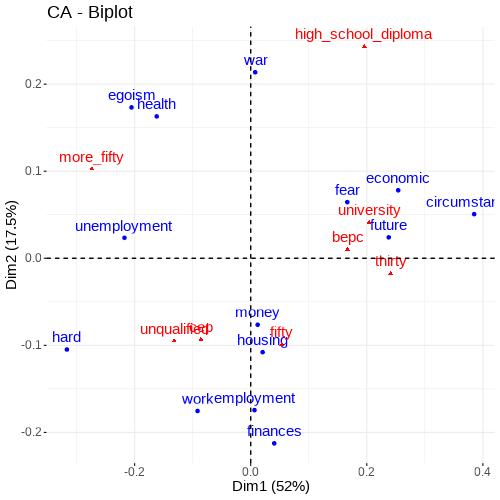

In [ ]:
%%R -w 500 -h 500 -u px
# Symetric Biplot of rows and columns
fviz_ca_biplot(children.CA)

The above biplot shows the relationships between the row and column categories in the `children` dataset. The length and direction of the vectors represent the strength and direction of the relationships between the variables. The closer the variables are to each other, the more similar they are in terms of their relationships with other variables. Red points represent the row categories, while blue points represent the column categories. The biplot helps to visualize the relationships between the different categories in the dataset.


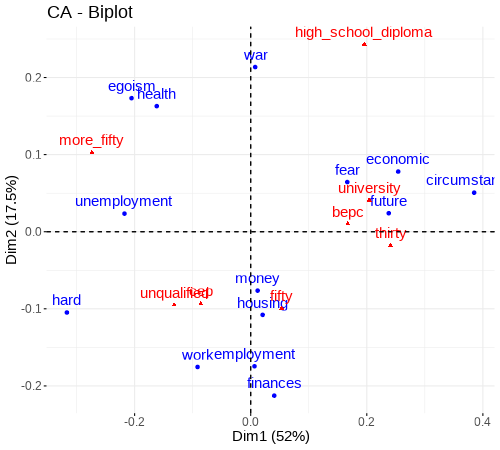

In [ ]:
%%R -w 500 -h 450 -u px
# Symetric Biplot of rows and columns
fviz_ca_biplot(children.CA)

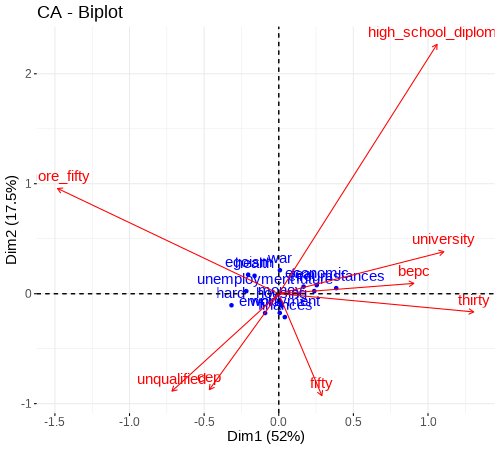

In [ ]:
%%R -w 500 -h 450 -u px
# Asymetric biplot, use arrows for columns
fviz_ca_biplot(children.CA, map ="rowprincipal",
 arrow = c(FALSE, TRUE))

The arrows in the above plot represent the column categories, while the points represent the row categories. The length and direction of the arrows indicate the strength and direction of the relationships between the column categories. The asymmetrical biplot helps to visualize the relationships between the column categories in the dataset.


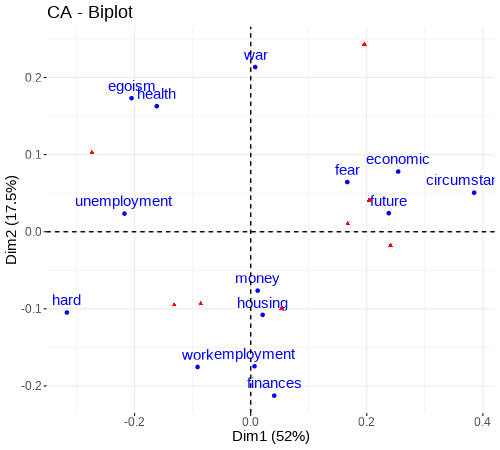

In [ ]:
%%R -w 500 -h 450 -u px
# Keep only the labels for row points
fviz_ca_biplot(children.CA, label ="row")

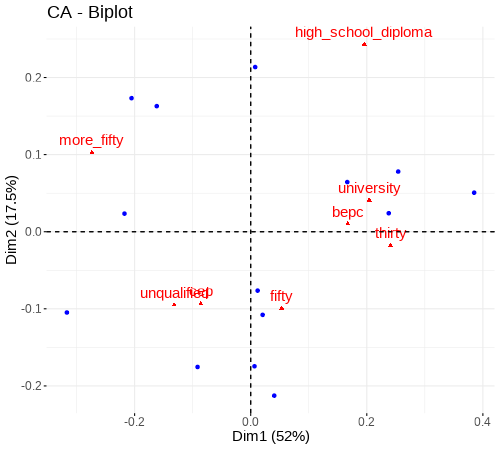

In [ ]:
%%R -w 500 -h 450 -u px
# Keep only labels for column points
fviz_ca_biplot(children.CA, label ="col")

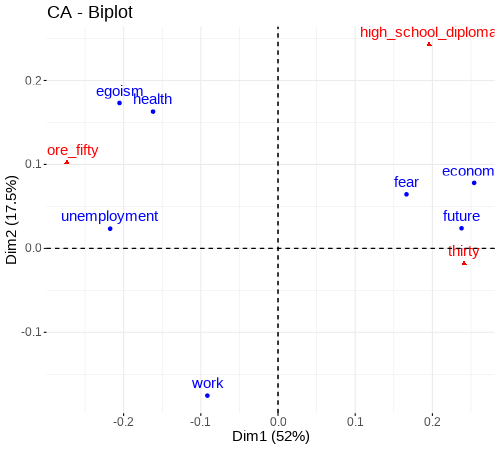

In [ ]:
%%R -w 500 -h 450 -u px
# Select the top 7 contributing rows
# And the top 3 columns
fviz_ca_biplot(children.CA,
               select.row = list(contrib = 7),
               select.col = list(contrib = 3))

#### SCA using the {adea4} package

`dudi.coa()` fuction from the {ade4} package is used to perform Correspondence Analysis (CA) in R. The `dudi.coa()` function takes a contingency table as input and returns an object of class `dudi` that contains the results of the analysis. `scannf` is a logical value indicating whether the eigenvalues bar plot should be displayed and `nf` an integer indicating the number of kept axes

In [ ]:
%%R
chlidren.coa<-dudi.coa(mf.children, scannf = FALSE, nf = 2)
chlidren.coa

Duality diagramm
class: coa dudi
$call: dudi.coa(df = mf.children, scannf = FALSE, nf = 2)

$nf: 2 axis-components saved
$rank: 7
eigen values: 0.03405 0.01149 0.009408 0.004337 0.003359 ...
  vector length mode    content       
1 $cw    8      numeric column weights
2 $lw    14     numeric row weights   
3 $eig   7      numeric eigen values  

  data.frame nrow ncol content             
1 $tab       14   8    modified array      
2 $li        14   2    row coordinates     
3 $l1        14   2    row normed scores   
4 $co        8    2    column coordinates  
5 $c1        8    2    column normed scores
other elements: N 


##### Extract and Visualize the Scores of dimensions

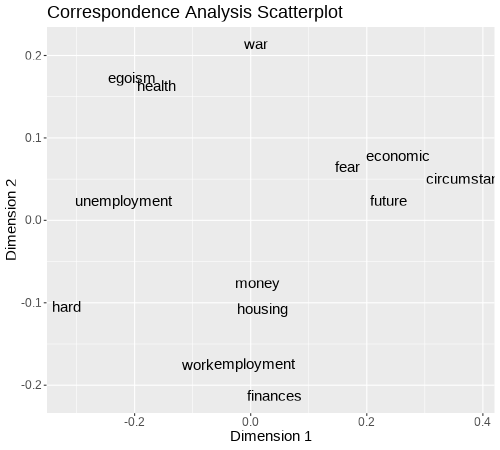

In [ ]:
%%R -w 500 -h 450 -u px
# Extract the scores of the dimensions
scores <- as.data.frame(chlidren.coa$li)
colnames(scores) <- c("Dim.1", "Dim.2")
# plot the scores
ggplot(scores, aes(x = Dim.1, y = Dim.2,
                   label = rownames(scores))) +
 geom_text() +
 xlab("Dimension 1") +
 ylab("Dimension 2") +
 ggtitle("Correspondence Analysis Scatterplot")

##### Biolot of Row and Column Categories

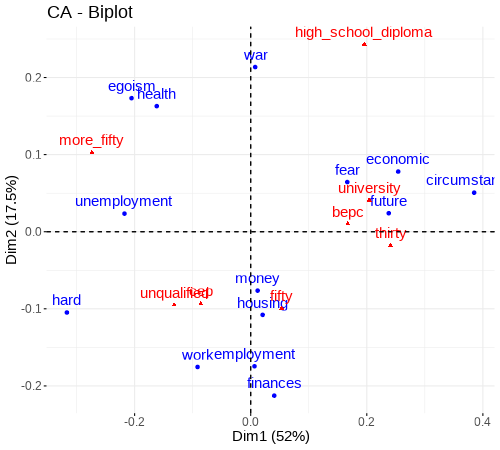

In [ ]:
%%R -w 500 -h 450 -u px
fviz_ca_biplot(chlidren.coa)

#### SCA using the {vegan} package

The `cca()` function from the {vegan} package is used to SCAi n R. It also optionally constrained correspondence analysis (a.k.a. canonical correspondence analysis), or optionally partial constrained correspondence analysis. Function \`rda(0)1 performs redundancy analysis, or optionally principal components analysis. These are all very popular ordination techniques in community ecology.

In [ ]:
%%R
chlidren.cca<-cca(X=mf.children)
summary(chlidren.cca)


Call:
cca(X = mf.children) 

Partitioning of scaled Chi-square:
              Inertia Proportion
Total         0.06552          1
Unconstrained 0.06552          1

Eigenvalues, and their contribution to the scaled Chi-square 

Importance of components:
                          CA1     CA2      CA3      CA4      CA5      CA6
Eigenvalue            0.03405 0.01149 0.009408 0.004337 0.003359 0.002147
Proportion Explained  0.51972 0.17533 0.143601 0.066202 0.051262 0.032770
Cumulative Proportion 0.51972 0.69505 0.838653 0.904855 0.956117 0.988887
                            CA7
Eigenvalue            0.0007281
Proportion Explained  0.0111128
Cumulative Proportion 1.0000000



##### Extract Eigenvalues

In [ ]:
%%R
summary(eigenvals(chlidren.cca))[,1:6] %>% round(3)

                        CA1   CA2   CA3   CA4   CA5   CA6
Eigenvalue            0.034 0.011 0.009 0.004 0.003 0.002
Proportion Explained  0.520 0.175 0.144 0.066 0.051 0.033
Cumulative Proportion 0.520 0.695 0.839 0.905 0.956 0.989


##### Extract and Visualize the Scores of dimensions

In [ ]:
%%R
scores(chlidren.cca, display = "sites")

                      CA1        CA2
money          0.06469231  0.7129658
future         1.28867528 -0.2236858
unemployment  -1.17855651 -0.2188840
circumstances  2.08624785 -0.4726784
hard          -1.71646984  0.9778446
economic       1.37704514 -0.7278817
egoism        -1.11275520 -1.6163196
employment     0.03540224  1.6280147
finances       0.21964786  1.9838803
war            0.04172000 -1.9929440
housing        0.11133672  1.0062897
fear           0.90188987 -0.6009739
health        -0.87737400 -1.5199507
work          -0.49592512  1.6368507


In [ ]:
%%R
scores(chlidren.cca, display = "species")

                            CA1         CA2
unqualified         -0.13207425  0.09492054
cep                 -0.08581732  0.09348988
bepc                 0.16706339 -0.01008181
high_school_diploma  0.19570511 -0.24312930
university           0.20412755 -0.04097165
thirty               0.24104666  0.01776346
fifty                0.05330527  0.09934740
more_fifty          -0.27355379 -0.10259440


`plot()` function can be used to visualize the results of a CCA. The `plot()` function provides a variety of plots, including biplots, ordination plots, and scree plots, to help visualize the relationships between the categories in the dataset.

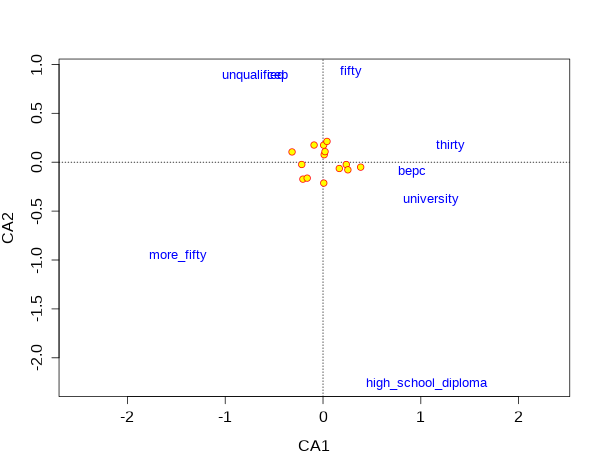

In [ ]:
%%R -w 600 -h 470 -u px
plot(chlidren.cca, type="n", scaling="sites")
#text(chlidren.cca, dis="cn", scaling="sites")
points(chlidren.cca, pch=21, col="red", bg="yellow", cex=1.2, scaling="sites")
text(chlidren.cca, "species", col="blue", cex=0.8, scaling="sites")

### Multiple Correspondence Analysis (MCA)

#### Data

This excercise we use the `tea` dataset from the {FactoMineR} package to perform Multiple Correspondence Analysis (MCA). The `tea` dataset contains information about 300 individuals how they drink tea (18 questions), what are their product's perception (12 questions) and some personal details (4 questions). A data frame with 300 rows and 36 columns. Rows represent the individuals, columns represent the different questions. The first 18 questions are active ones, the 19th is a supplementary quantitative variable (the age) and the last variables are supplementary categorical variables.

In [ ]:
%%R
# Example dataset (from FactoMineR)
data(tea)
glimpse(tea)

Rows: 300
Columns: 36
$ breakfast        <fct> breakfast, breakfast, Not.breakfast, Not.breakfast, b…
$ tea.time         <fct> Not.tea time, Not.tea time, tea time, Not.tea time, N…
$ evening          <fct> Not.evening, Not.evening, evening, Not.evening, eveni…
$ lunch            <fct> Not.lunch, Not.lunch, Not.lunch, Not.lunch, Not.lunch…
$ dinner           <fct> Not.dinner, Not.dinner, dinner, dinner, Not.dinner, d…
$ always           <fct> Not.always, Not.always, Not.always, Not.always, alway…
$ home             <fct> home, home, home, home, home, home, home, home, home,…
$ work             <fct> Not.work, Not.work, work, Not.work, Not.work, Not.wor…
$ tearoom          <fct> Not.tearoom, Not.tearoom, Not.tearoom, Not.tearoom, N…
$ friends          <fct> Not.friends, Not.friends, friends, Not.friends, Not.f…
$ resto            <fct> Not.resto, Not.resto, resto, Not.resto, Not.resto, No…
$ pub              <fct> Not.pub, Not.pub, Not.pub, Not.pub, Not.pub, Not.pub,…
$ Tea             

#### Fit Multiple Correspondence Analysis (MCA)

The `MCA()` function from the {FactoMineR} package is used to perform Multiple Correspondence Analysis (MCA) in R. The `MCA()` function takes a data frame with categorical variables as input and returns an object of class `MCA` that contains the results of the analysis. `quanti.sup` and `quali.sup` are used to specify the quantitative and categorical supplementary variables, respectively. The `graph` argument is used to specify whether to display the graph of the results.

In [ ]:
%%R
res.mca <- MCA(tea,
               quanti.sup=19,
               quali.sup=20:36,
               graph = FALSE)
summary(res.mca, plot=FALSE)


Call:
MCA(X = tea, quanti.sup = 19, quali.sup = 20:36, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.148   0.122   0.090   0.078   0.074   0.071   0.068
% of var.              9.885   8.103   6.001   5.204   4.917   4.759   4.522
Cumulative % of var.   9.885  17.988  23.989  29.192  34.109  38.868  43.390
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.065   0.062   0.059   0.057   0.054   0.052   0.049
% of var.              4.355   4.123   3.902   3.805   3.628   3.462   3.250
Cumulative % of var.  47.745  51.867  55.769  59.574  63.202  66.664  69.914
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.048   0.047   0.046   0.040   0.038   0.037   0.036
% of var.              3.221   3.127   3.037   2.683   2.541   2.438   2.378
Cumulative % of var.  73.135  76.262  79.298  81.982  84.523  86.96


`dimsec()` function can be used to extract the dimensions of the MCA results. The dimdesc() function can be used to o point out the variables and the categories that are the most characteristic according to each dimension obtained by a Factor Analysis.

In [ ]:
%%R
dimdesc(res.mca)

$`Dim 1`

Link between the variable and the categorical variable (1-way anova)
                     R2      p.value
where        0.41793014 1.255462e-35
tearoom      0.37189109 6.082138e-32
how          0.29882863 1.273180e-23
friends      0.24319952 8.616289e-20
resto        0.22646759 2.319804e-18
tea.time     0.19203800 1.652462e-15
price        0.21609382 4.050469e-14
pub          0.14722360 5.846592e-12
work         0.11153590 3.000872e-09
How          0.10285191 4.796010e-07
Tea          0.08950330 8.970954e-07
lunch        0.07458227 1.570629e-06
frequency    0.09438792 1.849071e-06
friendliness 0.07132511 2.706357e-06
evening      0.05311759 5.586801e-05
always       0.04479873 2.219503e-04
sex          0.03335969 1.487620e-03
dinner       0.03289362 1.608077e-03
breakfast    0.02539639 5.667604e-03
sugar        0.01527654 3.234986e-02

Link between variable and the categories of the categorical variables
                                 Estimate      p.value
where=chain store+

#### Plot the results of MCA

The `plot()` function can be used to visualize the results of an MCA. The `plot()` function provides a variety of plots, including biplots, ordination plots, and scree plots, to help visualize the relationships between the categories in the dataset.

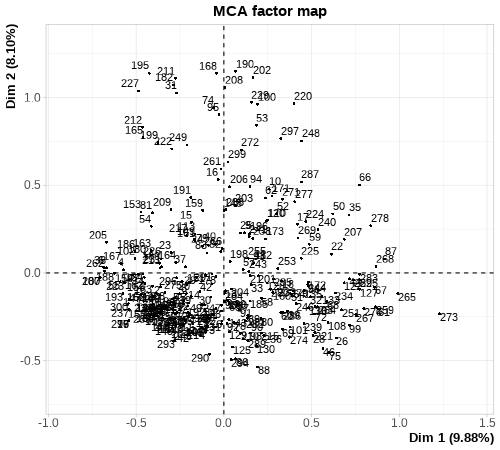

In [ ]:
%%R -w 500 -h 450 -u px
# plot
plot(res.mca,invisible=c("var","quali.sup","quanti.sup"),cex=0.7)

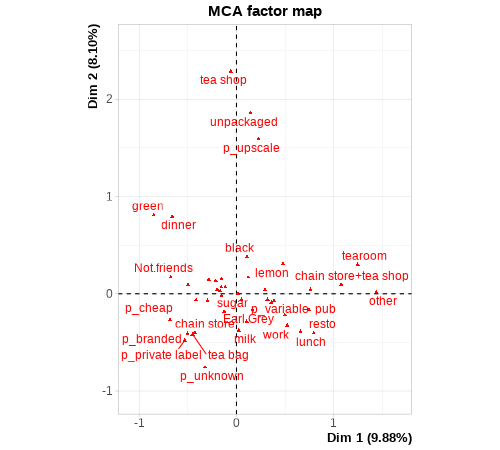

In [ ]:
%%R -w 500 -h 450 -u px
plot(res.mca,invisible=c("ind","quali.sup","quanti.sup"),cex=0.8)

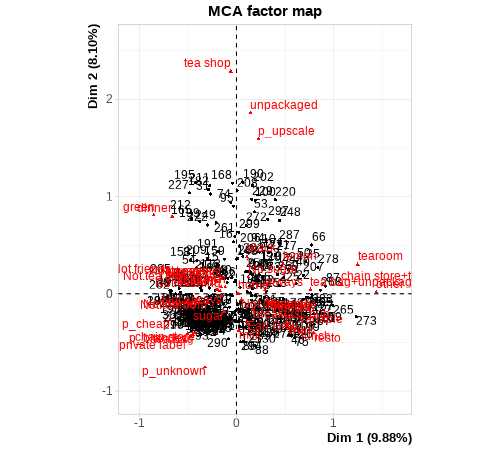

In [ ]:
%%R -w 500 -h 450 -u px
plot(res.mca,invisible=c("quali.sup","quanti.sup"),cex=0.8)

`plotellipses()` draw confidence ellipses around the categories


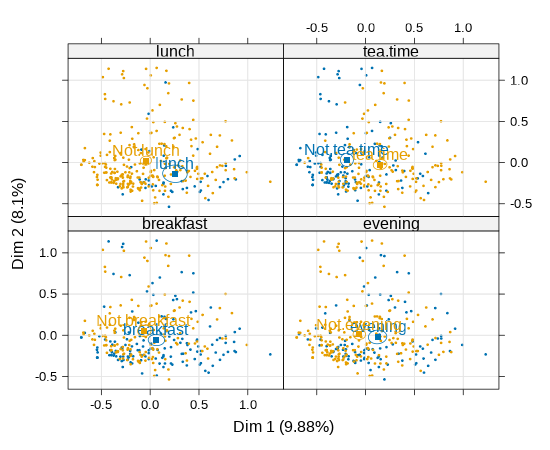

In [ ]:
%%R -w 550 -h 450 -u px
plotellipses(res.mca,keepvar=1:4)

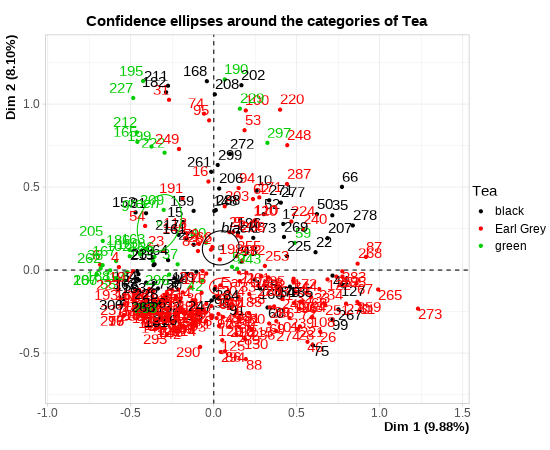

In [ ]:
%%R -w 550 -h 450 -u px
plotellipses(res.mca,keepvar="Tea")

### Detrended Correspondence Analysis (DCA)

#### Data

This exercise we will use `varespec` data set from {vegan} package. This data frame has 24 rows and 44 columns. Columns are estimated cover values of 44 species

In [ ]:
%%R
data(varespec)
glimpse(varespec)

Rows: 24
Columns: 44
$ Callvulg <dbl> 0.55, 0.67, 0.10, 0.00, 0.00, 0.00, 4.73, 4.47, 0.00, 24.13, …
$ Empenigr <dbl> 11.13, 0.17, 1.55, 15.13, 12.68, 8.92, 5.12, 7.33, 1.63, 1.90…
$ Rhodtome <dbl> 0.00, 0.00, 0.00, 2.42, 0.00, 0.00, 1.55, 0.00, 0.35, 0.07, 0…
$ Vaccmyrt <dbl> 0.00, 0.35, 0.00, 5.92, 0.00, 2.42, 6.05, 2.15, 18.27, 0.22, …
$ Vaccviti <dbl> 17.80, 12.13, 13.47, 15.97, 23.73, 10.28, 12.40, 4.33, 7.13, …
$ Pinusylv <dbl> 0.07, 0.12, 0.25, 0.00, 0.03, 0.12, 0.10, 0.10, 0.05, 0.12, 0…
$ Descflex <dbl> 0.00, 0.00, 0.00, 3.70, 0.00, 0.02, 0.78, 0.00, 0.40, 0.00, 0…
$ Betupube <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.02, 0.00, 0.00, 0.00, 0…
$ Vacculig <dbl> 1.60, 0.00, 0.00, 1.12, 0.00, 0.00, 2.00, 0.00, 0.20, 0.00, 0…
$ Diphcomp <dbl> 2.07, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.07, 0…
$ Dicrsp   <dbl> 0.00, 0.33, 23.43, 0.00, 0.00, 0.00, 0.03, 1.02, 0.30, 0.02, …
$ Dicrfusc <dbl> 1.62, 10.92, 0.00, 3.63, 3.42, 0.32, 37.07, 25.80, 0.52, 2.50…
$ Dicrpoly <dbl> 0.

#### Correspondence analysis/reciprocal averaging on a data set

The `decorana()` function from the {vegan} package is used to perform Detrended Correspondence Analysis (DCA) in R. The `decorana()` function takes a data frame with species abundance data as input and returns an object of class `decorana` that contains the results of the analysis. The argument `ira` is an integer specifying the detrending method to be used. The default is 1, which corresponds to basic Correspondence analysis  or  reciprocal averaging. The `ira= 0` corresponds to detrending.

In [ ]:
%%R
df.ra <- decorana(varespec,  ira=1 )
df.ra


Call:
decorana(veg = varespec, ira = 1) 

Orthogonal correspondence analysis.
Total inertia (scaled Chi-square): 2.0832 

                RA1    RA2    RA3    RA4
Eigenvalues  0.5249 0.3568 0.2344 0.1955
Axis lengths 3.3100 2.5227 2.8261 2.0362



#### Detrended correspondence analysis of transformed data

Perform a detrended correspondence analysis on a data set, preceded by transformations to correct for differences in sample size and differences in abundance among taxa. `decostan()` function from the {vegan} package is used to perform data transformation. The `decostand()` function standardizes a data frame of species abundances, and the `decorana()` function performs Detrended Correspondence Analysis (DCA) on the transformed data.

In [ ]:
%%R
# percent transformation on samples and  “total” method defaults to rows (samples)
df.01<-decostand(varespec, "total")
df.02<-decostand(varespec, "max")

default `ira=0` specifies detrending, and `iweigh=1` specifies down-weighting of rare species.

In [ ]:
%%R
dca.01<- decorana(df.02, ira = 0)
dca.02<- decorana(df.02, iweigh=1)

In [ ]:
%%R
names(dca.01)

 [1] "evals"          "rproj"          "cproj"          "adotj"         
 [5] "aidot"          "ira"            "iresc"          "short"         
 [9] "mk"             "totchi"         "evals.ortho"    "evals.decorana"
[13] "origin"         "v"              "fraction"       "iweigh"        
[17] "before"         "after"          "call"          


#### Scores of the ordination axes

In [ ]:
%%R
scores(dca.01)

          DCA1        DCA2        DCA3        DCA4
18 -0.64961840 -0.35674869  0.26578630  0.30831095
15 -0.11107423 -0.52475183  0.12054413  0.36957038
24  0.35121637  0.30182538 -1.14587054 -0.30428368
27  1.26661878 -0.36661825  0.31300757 -0.25658940
23  0.13252131 -0.23903603  0.41785586 -0.05485219
19  0.40282848  0.17774464  0.34444513 -0.09783870
22  0.38687451 -0.43317541 -0.01889923  0.39147237
16 -0.19513963 -0.55059491 -0.08182289  0.39313298
28  1.55181422 -0.76664865 -0.03070901 -0.28557629
13 -0.43471986 -0.07336440 -0.11879538  0.93468092
14 -0.37843446 -0.43654956 -0.23112771  0.28657468
20  0.03800399 -0.28164315 -0.12848913  0.04470122
25  0.32548334  0.42495924  0.90899670 -0.33553365
7  -0.61009749 -0.49333283  0.09923166  0.14791463
5  -1.39297993 -1.25738006  0.35705383 -0.15286422
6  -0.55116794 -0.18796847 -0.02603715  0.38847845
3  -0.68162655 -0.07330327  0.06635126  0.13690565
4  -1.33732659  0.88591230  0.09991692  0.24952792
2  -0.57778664  1.05127966  0.2

#### Plot the results of DCA

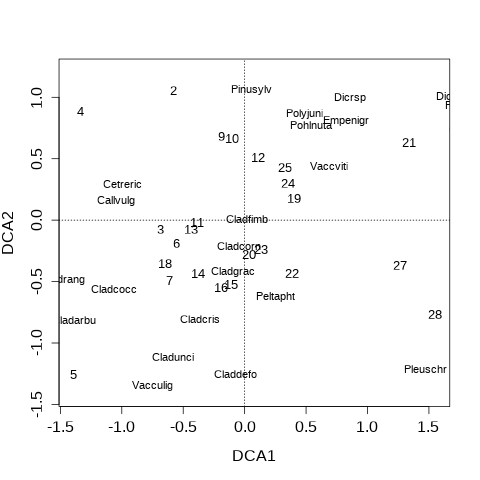

In [ ]:
%%R
plot(dca.01, display= c("sites"), cols=c(1,2),
     pch=3, col="green")
text(dca.01, display=c("species"), choices=1:2,
 cex=0.7)

### Canonical Correspondence Analysis (CCA)


#### Data

In this exercise we will use the `varespec` and `varechem` data sets from the {vegan} package to perform Canonical Correspondence Analysis (CCA). The  44 columns  are estimated cover values of 44 species. The `varechem` data frame has 24 rows and 14 columns, giving the soil characteristics of the very same sites as in the `varespec` data frame.

In [ ]:
%%R
data(varespec)
glimpse(varespec)

Rows: 24
Columns: 44
$ Callvulg <dbl> 0.55, 0.67, 0.10, 0.00, 0.00, 0.00, 4.73, 4.47, 0.00, 24.13, …
$ Empenigr <dbl> 11.13, 0.17, 1.55, 15.13, 12.68, 8.92, 5.12, 7.33, 1.63, 1.90…
$ Rhodtome <dbl> 0.00, 0.00, 0.00, 2.42, 0.00, 0.00, 1.55, 0.00, 0.35, 0.07, 0…
$ Vaccmyrt <dbl> 0.00, 0.35, 0.00, 5.92, 0.00, 2.42, 6.05, 2.15, 18.27, 0.22, …
$ Vaccviti <dbl> 17.80, 12.13, 13.47, 15.97, 23.73, 10.28, 12.40, 4.33, 7.13, …
$ Pinusylv <dbl> 0.07, 0.12, 0.25, 0.00, 0.03, 0.12, 0.10, 0.10, 0.05, 0.12, 0…
$ Descflex <dbl> 0.00, 0.00, 0.00, 3.70, 0.00, 0.02, 0.78, 0.00, 0.40, 0.00, 0…
$ Betupube <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.02, 0.00, 0.00, 0.00, 0…
$ Vacculig <dbl> 1.60, 0.00, 0.00, 1.12, 0.00, 0.00, 2.00, 0.00, 0.20, 0.00, 0…
$ Diphcomp <dbl> 2.07, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.07, 0…
$ Dicrsp   <dbl> 0.00, 0.33, 23.43, 0.00, 0.00, 0.00, 0.03, 1.02, 0.30, 0.02, …
$ Dicrfusc <dbl> 1.62, 10.92, 0.00, 3.63, 3.42, 0.32, 37.07, 25.80, 0.52, 2.50…
$ Dicrpoly <dbl> 0.

In [ ]:
%%R
data(varechem)
glimpse(varechem)

Rows: 24
Columns: 14
$ N        <dbl> 19.8, 13.4, 20.2, 20.6, 23.8, 22.8, 26.6, 24.2, 29.8, 28.1, 2…
$ P        <dbl> 42.1, 39.1, 67.7, 60.8, 54.5, 40.9, 36.7, 31.0, 73.5, 40.5, 3…
$ K        <dbl> 139.9, 167.3, 207.1, 233.7, 180.6, 171.4, 171.4, 138.2, 260.0…
$ Ca       <dbl> 519.4, 356.7, 973.3, 834.0, 777.0, 691.8, 738.6, 394.6, 748.6…
$ Mg       <dbl> 90.0, 70.7, 209.1, 127.2, 125.8, 151.4, 94.9, 45.3, 105.3, 11…
$ S        <dbl> 32.3, 35.2, 58.1, 40.7, 39.5, 40.8, 33.8, 27.1, 42.5, 60.2, 3…
$ Al       <dbl> 39.0, 88.1, 138.0, 15.4, 24.2, 104.8, 20.7, 74.2, 17.9, 329.7…
$ Fe       <dbl> 40.9, 39.0, 35.4, 4.4, 3.0, 17.6, 2.5, 9.8, 2.4, 109.9, 4.6, …
$ Mn       <dbl> 58.1, 52.4, 32.1, 132.0, 50.1, 43.6, 77.6, 24.4, 106.6, 61.7,…
$ Zn       <dbl> 4.5, 5.4, 16.8, 10.7, 6.6, 9.1, 7.4, 5.2, 9.3, 9.1, 8.1, 10.2…
$ Mo       <dbl> 0.30, 0.30, 0.80, 0.20, 0.30, 0.40, 0.30, 0.30, 0.30, 0.50, 0…
$ Baresoil <dbl> 43.90, 23.60, 21.20, 18.70, 46.00, 40.50, 23.00, 29.80, 17.60…
$ Humdepth <dbl> 2.

#### Fit CCA Model

Function `cca()` function of {vegan} performs performs Canonical Correspondence analysis, or optionally constrained correspondence analysis), or optionally partial constrained correspondence analysis. Function `rda()` performs redundancy analysis, or optionally principal components analysis. These are all very popular ordination techniques in community ecology. `X` is the species data (`varespec`), `Y` is the environmental data (`varechem`), and the `data` argument is the data frame containing the species and environmental data.

We can conduct the CCA in two ways.  First, we can identify the response and explanatory objects separately:

In [ ]:
%%R
## environmental data matrix
vare.cca.01 <- cca(X=varespec, Y=varechem)
vare.cca.01

Call: cca(X = varespec, Y = varechem)

-- Model Summary --

              Inertia Proportion Rank
Total          2.0832     1.0000     
Constrained    1.4415     0.6920   14
Unconstrained  0.6417     0.3080    9

Inertia is scaled Chi-square

-- Eigenvalues --

Eigenvalues for constrained axes:
  CCA1   CCA2   CCA3   CCA4   CCA5   CCA6   CCA7   CCA8   CCA9  CCA10  CCA11 
0.4389 0.2918 0.1628 0.1421 0.1180 0.0890 0.0703 0.0584 0.0311 0.0133 0.0084 
 CCA12  CCA13  CCA14 
0.0065 0.0062 0.0047 

Eigenvalues for unconstrained axes:
    CA1     CA2     CA3     CA4     CA5     CA6     CA7     CA8     CA9 
0.19776 0.14193 0.10117 0.07079 0.05330 0.03330 0.01887 0.01510 0.00949 



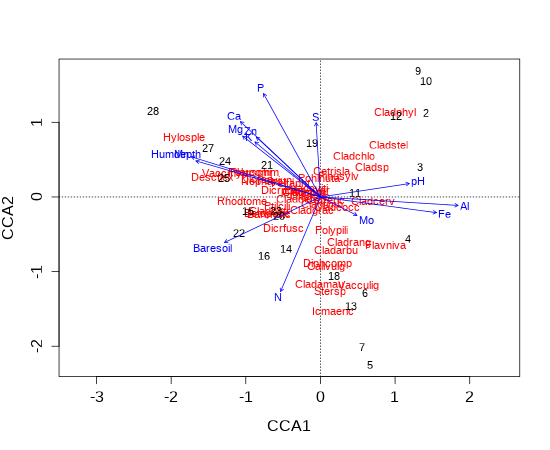

In [ ]:
%%R -w 550 -h 450 -u px
plot(vare.cca.01)

Second, we can specify a formula relating the response to the explanatory variables:

In [ ]:
%%R
## Formula interface and a better model
vare.cca.02 <- cca(varespec ~ Al + P*(K + Baresoil), data=varechem)
vare.cca.02

Call: cca(formula = varespec ~ Al + P * (K + Baresoil), data = varechem)

-- Model Summary --

              Inertia Proportion Rank
Total           2.083      1.000     
Constrained     1.046      0.502    6
Unconstrained   1.038      0.498   17

Inertia is scaled Chi-square

-- Eigenvalues --

Eigenvalues for constrained axes:
  CCA1   CCA2   CCA3   CCA4   CCA5   CCA6 
0.3756 0.2342 0.1407 0.1323 0.1068 0.0561 

Eigenvalues for unconstrained axes:
    CA1     CA2     CA3     CA4     CA5     CA6     CA7     CA8 
0.27577 0.15411 0.13536 0.11803 0.08887 0.05511 0.04919 0.03781 
(Showing 8 of 17 unconstrained eigenvalues)



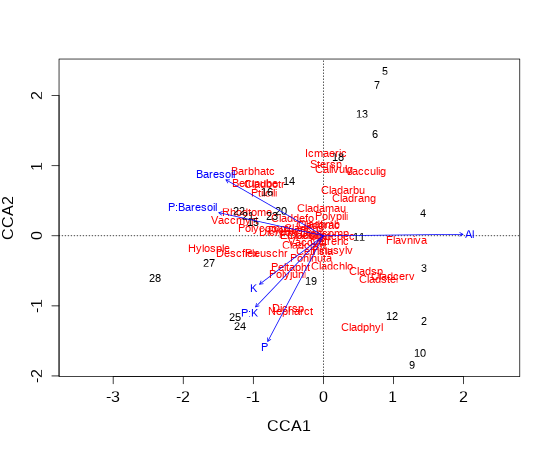

In [ ]:
%%R -w 550 -h 450 -u px
plot(vare.cca.02)

In [ ]:
%%R
## Partialling out and negative components of variance
vare.cca.03<-cca(varespec ~ Ca + Condition(pH), varechem)
vare.cca.03

Call: cca(formula = varespec ~ Ca + Condition(pH), data = varechem)

-- Model Summary --

              Inertia Proportion Rank
Total          2.0832     1.0000     
Conditional    0.1458     0.0700    1
Constrained    0.1827     0.0877    1
Unconstrained  1.7547     0.8423   21

Inertia is scaled Chi-square

-- Eigenvalues --

Eigenvalues for constrained axes:
   CCA1 
0.18269 

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8 
0.3834 0.2749 0.2123 0.1760 0.1701 0.1161 0.1089 0.0880 
(Showing 8 of 21 unconstrained eigenvalues)



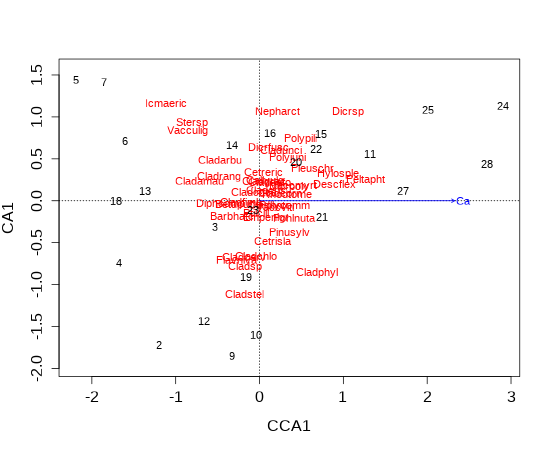

In [ ]:
%%R -w 550 -h 450 -u px
plot(vare.cca.03)

### Canonical Correlation Analysis (CCA)

#### Data

In this exercise we will use following data set.

[gp_soil_data.csv](https://www.dropbox.com/s/9ikm5yct36oflei/gp_soil_data.csv?dl=0)



We will use `read_csv()` function of {readr} package to import data as a **tidy** data from my github repository. The `glimpse()` function from {dplyr} package can be used to get a quick overview of the data

In [ ]:
%%R
# Load data
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/gp_soil_data.csv")
glimpse(mf)

Rows: 467 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 467
Columns: 19
$ ID        <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…
$ FIPS      <dbl> 56041, 56023, 56039, 56039, 56029, 56039, 56039, 56039, 5603…
$ STATE_ID  <dbl> 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, …
$ STATE     <chr> "Wyoming", "Wyoming", "Wyoming", "Wyoming", "Wyoming", "Wyom…
$ COUNTY    <chr> "Uinta County", "Lincoln County", "Teton County", "Teton Cou…
$ Longitude <dbl> -111.0119, -110.9830, -110.8065, -110.7344, -110.7308, -110.…
$ Latitude  <dbl> 41.05630, 42.88350, 44.53497, 44.43289, 44.80635, 44.09124, …
$ SOC       <dbl> 15.763, 15.8

#### Preparing Two Datasets for Canonical Correlation Analysis (CCA)

We will split the the data into two high-dimensional datasets and We will also scale the variables to put them on the same scale.

1.  X: Data with train variables: DEM, Aspect, Slope, and TP1

2.  Y: MAT, MAP, NDVI

In R, `scale()` is generic function whose default method centers and/or scales the columns of a numeric matrix.

In [ ]:
%%R
X<-mf %>% dplyr::select( DEM, Aspect, Slope,TPI) %>%
  scale()
Y<-mf %>% dplyr::select(MAT, MAP, NDVI) %>%
  scale()

#### Compute canonical correlations

The `cancor()` function of {CCA} package is used for computing canonical correlations between two sets of variables. It returns a list containing the correlation between the variables and the coefficients


In [ ]:
%%R
cc <- cancor(X,Y)
print(cc)

$cor
[1] 0.8573999 0.5530778 0.1828072

$xcoef
               [,1]         [,2]        [,3]         [,4]
DEM     0.052632132  0.036014771  0.01251337 -0.005520457
Aspect -0.002505462 -0.008496253  0.03772102  0.028805905
Slope  -0.009159251 -0.059569664 -0.02733187 -0.002101725
TPI    -0.003082211 -0.010559004  0.02497863 -0.037444837

$ycoef
             [,1]         [,2]        [,3]
MAT  -0.042429859  0.019223196 -0.02211589
MAP  -0.014608094 -0.034441590  0.07607734
NDVI -0.005251573 -0.009221375 -0.08590261

$xcenter
          DEM        Aspect         Slope           TPI 
 5.057815e-17  2.663915e-16  1.001459e-17 -6.504284e-18 

$ycenter
          MAT           MAP          NDVI 
-2.102767e-16  5.658096e-17  1.456276e-16 



In [ ]:
%%R
cc$ycoef

             [,1]         [,2]        [,3]
MAT  -0.042429859  0.019223196 -0.02211589
MAP  -0.014608094 -0.034441590  0.07607734
NDVI -0.005251573 -0.009221375 -0.08590261


In [ ]:
%%R
cc$xcoef

               [,1]         [,2]        [,3]         [,4]
DEM     0.052632132  0.036014771  0.01251337 -0.005520457
Aspect -0.002505462 -0.008496253  0.03772102  0.028805905
Slope  -0.009159251 -0.059569664 -0.02733187 -0.002101725
TPI    -0.003082211 -0.010559004  0.02497863 -0.037444837


#### Interpretation the results of a CCA

In order to interpret the results of a CCA, it is important to look at both the canonical correlations and the canonical variables. The canonical correlations indicate how strongly the two sets of variables are related, while the canonical variables show which variables in each set are most strongly related to each other.


##### Correlations between the canonical variates


In [ ]:
%%R
cc$cor

[1] 0.8573999 0.5530778 0.1828072


The correlation between the first canonical variates from these two data is pretty high, suggesting that both the data sets have strong covariation.


##### Get the Canonical Covariate Pairs

In [ ]:
%%R
CC1_X <- as.matrix(X) %*%  cc$xcoef[, 1]
CC1_Y <- as.matrix(Y) %*%  cc$ycoef[, 1]
cor(CC1_X,CC1_Y)

          [,1]
[1,] 0.8573999


In [ ]:
%%R
CC2_X <- as.matrix(X) %*%  cc$xcoef[, 2]
CC2_Y <- as.matrix(Y) %*%  cc$ycoef[, 2]
cor(CC2_X,CC2_Y)

          [,1]
[1,] 0.5530778


##### Create a dataframe canonical covariates

In [ ]:
%%R
cca_df <- mf %>%
  mutate(CC1_X=CC1_X,
         CC1_Y=CC1_Y,
         CC2_X=CC2_X,
         CC2_Y=CC2_Y) |>
  glimpse()

Rows: 467
Columns: 23
$ ID        <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…
$ FIPS      <dbl> 56041, 56023, 56039, 56039, 56029, 56039, 56039, 56039, 5603…
$ STATE_ID  <dbl> 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, …
$ STATE     <chr> "Wyoming", "Wyoming", "Wyoming", "Wyoming", "Wyoming", "Wyom…
$ COUNTY    <chr> "Uinta County", "Lincoln County", "Teton County", "Teton Cou…
$ Longitude <dbl> -111.0119, -110.9830, -110.8065, -110.7344, -110.7308, -110.…
$ Latitude  <dbl> 41.05630, 42.88350, 44.53497, 44.43289, 44.80635, 44.09124, …
$ SOC       <dbl> 15.763, 15.883, 18.142, 10.745, 10.479, 16.987, 24.954, 6.28…
$ DEM       <dbl> 2229.079, 1889.400, 2423.048, 2484.283, 2396.195, 2360.573, …
$ Aspect    <dbl> 159.1877, 156.8786, 168.6124, 198.3536, 201.3215, 208.9732, …
$ Slope     <dbl> 5.6716146, 8.9138117, 4.7748051, 7.1218114, 7.9498644, 9.663…
$ TPI       <dbl> -0.08572358, 4.55913162, 2.60588670, 5.14693117, 3.75570583,…
$ KFactor   <dbl> 

##### Scatter plot between the first pair of canonical covariate

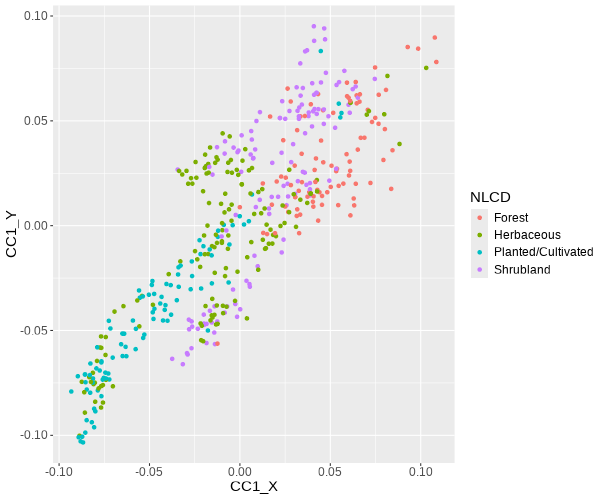

In [ ]:
%%R -w 600 -h 500 -u px
cca_df  |>
  ggplot(aes(x=CC1_X,y=CC1_Y, color=NLCD))+
  geom_point()

To see if each of canonical variate is correlated with NLCD, you create boxplots between two canonical covariates and NLCD.



Attaching package: ‘patchwork’



    area




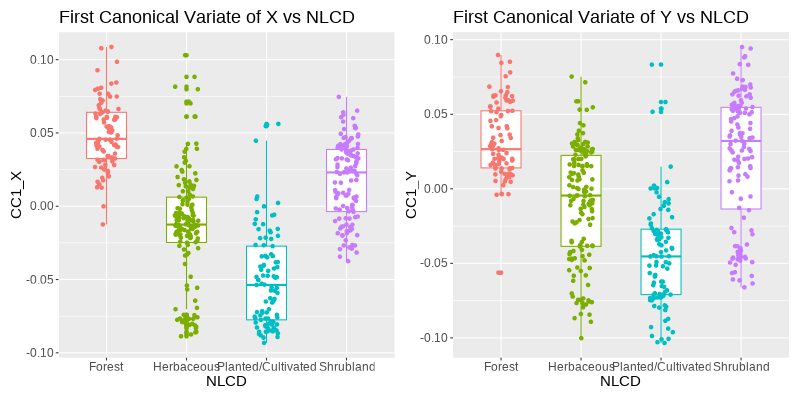

In [ ]:
%%R -w 800 -h 400 -u px
# First Canonical Variate of X vs Latent Variable
p1<-cca_df  |>
  ggplot(aes(x=NLCD,y=CC1_X, color=NLCD))+
  geom_boxplot(width=0.5)+
  geom_jitter(width=0.15)+
  theme(legend.position="none")+
  ggtitle("First Canonical Variate of X vs NLCD")

# First Canonical Variate of Y vs Latent Variable
p2<-cca_df  |>
  ggplot(aes(x=NLCD,y=CC1_Y, color=NLCD))+
  geom_boxplot(width=0.5)+
  geom_jitter(width=0.15)+
  theme(legend.position="none")+
  ggtitle("First Canonical Variate of Y vs NLCD")
library(patchwork)
p1+p2

## Summary and Conclusion

This tutorial provides an overview of multivariate statistical techniques, including Correspondence Analysis (CA), Detrended Correspondence Analysis (DCA), Canonical Correspondence Analysis (CCA), and Canonical Correlation Analysis (CCA). These techniques are widely used in statistics, ecology, and machine learning for multivariate data analysis. We have also demonstrated how to perform these analyses in R using the {FactoMineR}, {vegan}, {ca}, and {CCA} packages. These techniques are useful for exploring relationships between categorical variables, identifying patterns in survey data, and analyzing the relationship between species and environmental variables in ecological studies.




## References

1.  [Introduction to Canonical Correlation Analysis (CCA) in R](https://cmdlinetips.com/2020/12/canonical-correlation-analysis-in-r/)

2.  [CANONICAL CORRELATION ANALYSIS \| R DATA ANALYSIS EXAMPLES](https://stats.oarc.ucla.edu/r/dae/canonical-correlation-analysis/)

3.  [41. CA, DCA, and CCA](https://uw.pressbooks.pub/appliedmultivariatestatistics/chapter/ca-dca-and-cca/#Introduction)

4.  [Correspondence Analysis Using R](https://www.geeksforgeeks.org/correspondence-analysis-using-r/)

5. [Detrended Correspondence Analysis](http://stratigrafia.org/software/pdf/dcaTutorial.pdf)

